In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [3]:
xmin = -75
xmax = -70
ymin = -40
ymax = -30
vmin = -2
vmax = 2

In [4]:
def compareInitial(case):

    ax1 = plt.subplot(131)
    fileName = '../easyWave_'+case+'/eWave.2D.{0:05d}.ssh'.format(0) 
    lon, lat, h0 = ew2py(fileName)
    p1 = plt.pcolormesh(lon,lat,h0[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
    ax1.set_ylim(ymin,ymax)
    ax1.set_xlim(xmin,xmax)
    ax1.set_aspect(1)
    ax1.set_title('EasyWave')

    ax2 = plt.subplot(132)
    h1 = np.loadtxt('../tsunamilab/tlab2D_'+case,delimiter=',',skiprows=1).reshape((361,361))
    p2= plt.pcolormesh(lon,lat,h1[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
    ax2.set_ylim(ymin,ymax)
    ax2.set_xlim(xmin,xmax)
    ax2.set_aspect(1)
    ax2.set_title('Before')

    ax3 = plt.subplot(133)
    h2 = np.loadtxt('../tsunamilab/tlab2D_'+case+'2',delimiter=',',skiprows=1).reshape((361,361))
    p2= plt.pcolormesh(lon,lat,h2[:-1,:-1],cmap=plt.cm.seismic,vmin=vmin,vmax=vmax)
    ax3.set_ylim(ymin,ymax)
    ax3.set_xlim(xmin,xmax)
    ax3.set_aspect(1)
    ax3.set_title('After')


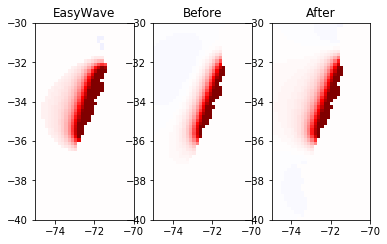

In [5]:
compareInitial('begintop')

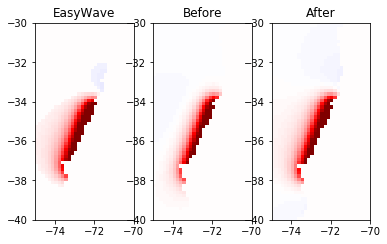

In [6]:
compareInitial('midtop')

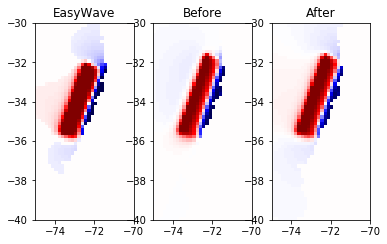

In [7]:
compareInitial('beginbot')

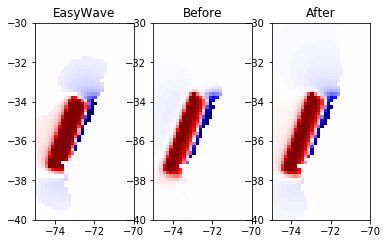

In [8]:
compareInitial('midbot')

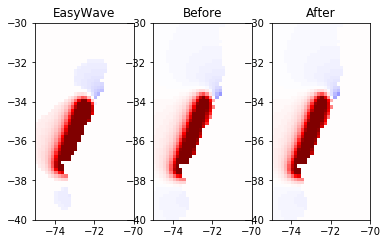

In [9]:
compareInitial('center')